In [12]:
#Get a pickled dict from python and export it to json format.
from __future__ import division
from collections import Counter,defaultdict
import pickle
import numpy as np
import pandas as pd

from bokeh.plotting import figure, show, output_file
from bokeh.layouts import row,column,layout ,widgetbox
from bokeh.models import ColumnDataSource,HoverTool,BoxSelectTool 
from bokeh.models.widgets import Button,Slider

from bokeh.models.callbacks import CustomJS
from bokeh.io import curdoc

from bokeh import events
from bokeh.models import LinearInterpolator
from bokeh.models.mappers import LinearColorMapper
from bokeh.palettes import viridis

In [13]:
import matplotlib.pyplot as plt

from bokeh.io import output_notebook,output_file
output_notebook()

Loading BokehJS ...

In [51]:
df=pd.read_csv('./YFT_faces29_reduced.csv')
preds=df['preds']
label=df['label']
df=df.iloc[:,1:]
df.columns=['xs','ys','label','preds']

In [57]:
%%time
df2=pd.read_csv('./YTF_dataset_nextf_test.csv')
df2.columns

Wall time: 3min 1s


In [101]:
%%time
df3=pd.read_csv('./testPredictions.csv')
df3.columns

Wall time: 8.61 s


In [ ]:
df2=df2.iloc[:,1:]
print(df2.columns,df2.shape)

In [102]:
df3=df3.iloc[:,1:]
print(df3.columns,df3.shape)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '12278', '12279', '12280', '12281', '12282', '12283', '12284', '12285',
       '12286', '12287'],
      dtype='object', length=12288) (195, 12288)


In [ ]:
import scipy.misc
for i in range(df2.shape[0]):
    img=df2.iloc[i,:-1].as_matrix()
    img=img.reshape(64,64,3)
    scipy.misc.toimage(img).save('TestImages/outfile'+str(i)+'.jpg')

In [109]:
import matplotlib.image as mpimg
img=df3.iloc[30,:].as_matrix()
img=img.reshape(64,64,3)
scipy.misc.toimage(img).save('TestImages/outfile'+'.jpg')

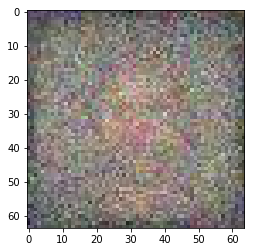

In [110]:
import matplotlib.image as mpimg
img=mpimg.imread('TestImages/outfile.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
#plot an image from the reshape of first image.
img = np.zeros((64,64), dtype=np.uint32)
view = img.view(dtype=np.uint8).reshape((64,64, 4))

i=df.iloc[0,:].as_matrix().reshape(64,64,3)
view[:,:,0]=i[:,:,0]
view[:,:,1]=i[:,:,1]
view[:,:,2]=i[:,:,2]
view[:,:,3]=1


p=figure()
p.image_rgba(image=[img],x=0,y=0,dw=10,dh=10)
show(p)

In [52]:
data_source=ColumnDataSource(df)

images_source=ColumnDataSource(data=dict(images=[]))

scatter_plot=None
img=None

tap_callback = CustomJS(args=dict(source=data_source,source2=images_source),code="""
        var selected = source.selected['1d'].indices;
        console.log(cb_data.source,cb_data.geometries,selected[0]);
        var data =cb_data.source['data'];
        var data2=source2['data'];
        var ind0 =selected[0];
        var arr=data['images'][ind0]
        var newArr = [];
        while(arr.length) 
            newArr.push(arr.splice(0,28));             
             data2['images']=newArr;       
             source2.change.emit();
    """)


hover=HoverTool(tooltips=[('Pred:',"@preds"),\
                          ('TrueLabel:','@label')],show_arrow=False)
size_mapper=LinearInterpolator(x=[0,len(label)],\
      y=[5,50])

color_mapper=LinearColorMapper(low=0,\
                               high=max(label),\
                              palette=viridis(150))

scatter_plot=figure(toolbar_location='above',plot_width=600,plot_height=500,title='Youtube faces')
scatter_plot.circle('xs','ys',source=data_source,fill_color={'field':'label','transform':color_mapper},\
                    size={'field':'preds','transform':size_mapper})
scatter_plot.add_tools(hover)
show(scatter_plot)